<a href="https://colab.research.google.com/github/abhinav-bhardwaj-mnit/Abhinav-1st/blob/main/svm_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(dir(digits))
df = pd.DataFrame(digits.data,columns = feature_names)
print(df.head())


(1797, 64)
['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  ...  pixel_59  pixel_60  pixel_61  pixel_62  pixel_63
0      0.0      0.0      5.0     13.0      9.0  ...      13.0      10.0       0.0       0.0       0.0
1      0.0      0.0      0.0     12.0     13.0  ...      11.0      16.0      10.0       0.0       0.0
2      0.0      0.0      0.0      4.0     15.0  ...       3.0      11.0      16.0       9.0       0.0
3      0.0      0.0      7.0     15.0     13.0  ...      13.0      13.0       9.0       0.0       0.0
4      0.0      0.0      0.0      1.0     11.0  ...       2.0      16.0       4.0       0.0       0.0

[5 rows x 64 columns]
[0 1 2 3 4 5 6 7 8 9]


In [58]:
df['target']=digits.target
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,pixel_40,pixel_41,pixel_42,pixel_43,pixel_44,pixel_45,pixel_46,pixel_47,pixel_48,pixel_49,pixel_50,pixel_51,pixel_52,pixel_53,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


<Figure size 640x480 with 0 Axes>

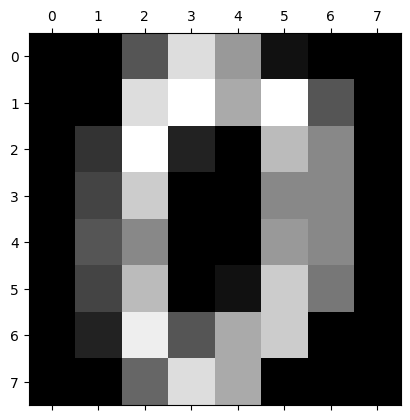

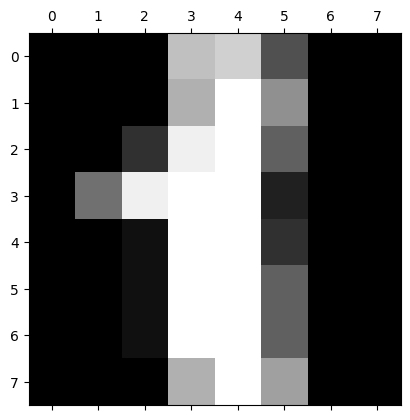

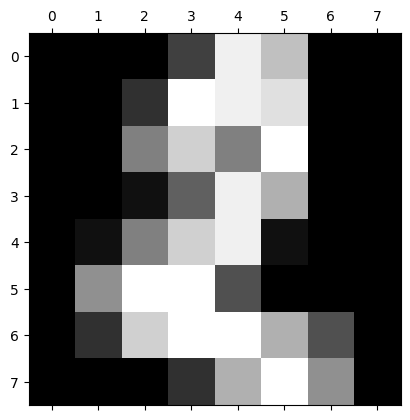

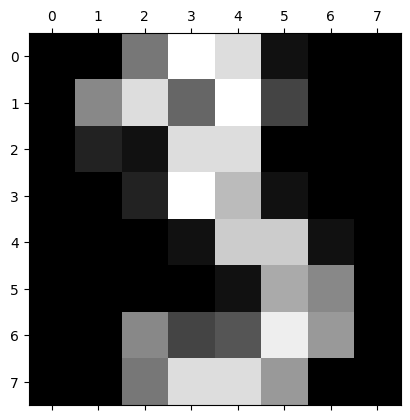

In [53]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [57]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [71]:
import numpy as np

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['target'],axis='columns'),digits.target,test_size=.2)
print(f'Training set size :{len(X_train)}')
print(f'Testing set size : {len(X_test)}')
print(f'class distribution in ytrain {np.bincount(y_train)}')
print(f'class distribution in ytest {np.bincount(y_test)}')
print((len(X_train)+len(X_test)))


Training set size :1437
Testing set size : 360
class distribution in ytrain [143 147 134 145 145 150 151 137 139 146]
class distribution in ytest [35 35 43 38 36 32 30 42 35 34]
1797


In [85]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9944444444444445

In [86]:
import numpy as np
random_sample = np.random.rand(1, 64) * 16  # Pixel values range from 0-16
print("Predicted Label:", model.predict(random_sample))

Predicted Label: [2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [89]:
#linear
model_kernel_linear = SVC(kernel='linear')
model_kernel_linear.fit(X_train,y_train)
print(model_kernel_linear.score(X_test,y_test))
#RBF
model_kernel_rbf = SVC(kernel='rbf')
model_kernel_rbf.fit(X_train,y_train)
model_kernel_rbf.score(X_test,y_test)

0.9666666666666667


0.9944444444444445

In [91]:
#gamma
model_gamma = SVC(gamma=10)
model_gamma.fit(X_train,y_train)
print(model_gamma.score(X_test,y_test))
#regularisation
model_C = SVC(C=1)
model_C.fit(X_train,y_train)
model_C.score(X_test,y_test)


0.08333333333333333


0.9944444444444445